In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure underfitting_learning_curves_plot


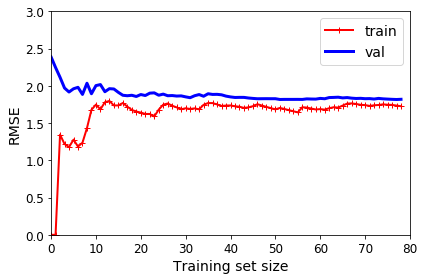

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")   
plt.show()                                      

Saving figure underfitting_learning_curves_plot


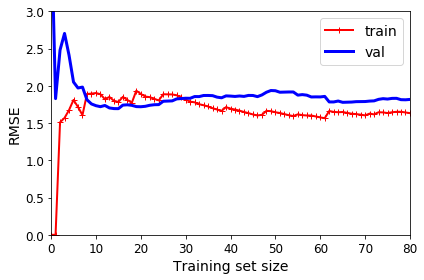

In [14]:
m2 = 200
X2 = 6 * np.random.rand(m2, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np.random.randn(m2, 1)
lin_reg2 = LinearRegression()
plot_learning_curves(lin_reg2, X2, y2)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")   
plt.show()           

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Saving figure learning_curves_plot


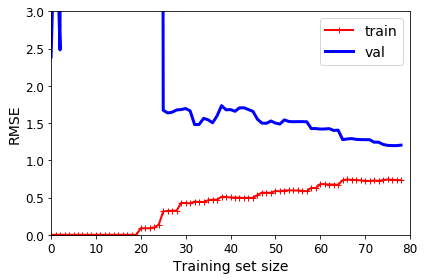

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
lr_withpolynomialfeatures = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(lr_withpolynomialfeatures, X_poly, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()        

Saving figure learning_curves_plot


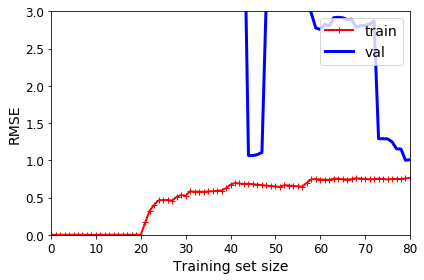

In [9]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features.fit_transform(X2)
plot_learning_curves(lr_withpolynomialfeatures, X_poly2, y2)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show() 

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston_dataset = load_boston()
X_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
Y_boston = pd.DataFrame(boston_dataset.target, columns=['MEDV'])

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(X_boston, Y_boston, random_state=0)
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [24]:
param_grid = {'polynomialfeatures__degree' : [1,2,3], 'ridge__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(x_train, y_train)

C:\Users\yasem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yasem\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
    

In [38]:
print('Best values:{}'.format(grid.best_params_))

Best values:{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [42]:
print('Train Set Score:{:.2f}'.format(grid.score(x_train, y_train)))

Train Set Score:0.94


In [41]:
print('Test Set Score:{:.2f}'.format(grid.score(x_test, y_test)))

Test Set Score:0.77


In [37]:
print('Best Estimator:\n{}'.format(grid.best_estimator_))

Best Estimator:
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)
